In [9]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [10]:
wineq = pd.read_csv("~/Downloads/Wine_Quality_Linear_Regression_Neural_Networks-main/winequality-red.csv")

In [11]:
print(wineq)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [12]:
quality = wineq.quality

In [14]:
winex = wineq.drop(['quality'],axis = 'columns')

In [15]:
#Linear Regression modeling and visualization
mlr = LinearRegression()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(winex, quality, train_size = 0.8, test_size = 0.2)

In [17]:
model = mlr.fit(x_train,y_train)

In [18]:
y_pred = mlr.predict(x_test)
print(mlr.coef_)

[ 4.11776018e-02 -1.03181673e+00 -1.94102266e-01  2.07908278e-02
 -1.94048558e+00  2.82459396e-03 -2.81718555e-03 -2.72080775e+01
 -3.98771757e-01  8.23130833e-01  2.74333704e-01]


In [19]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.34809006669071385
Test score:
0.4069557114250498


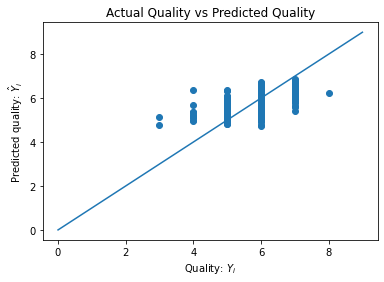

In [20]:
plt.scatter(y_test, y_pred)
plt.plot(range(10), range(10))

plt.xlabel("Quality: $Y_i$")
plt.ylabel("Predicted quality: $\hat{Y}_i$")
plt.title("Actual Quality vs Predicted Quality")

plt.show()

In [21]:
#Neural Network

#Normalization/Data Preparation
mean = x_train.mean(axis=0) 
x_train -=mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [24]:
def build_model(): 
    dlmodel = models.Sequential() 
    
    dlmodel.add(layers.Dense(64, activation = 'relu',input_shape=(x_train.shape[1],))) 
    dlmodel.add(layers.Dense(64, activation='relu')) 
    dlmodel.add(layers.Dense(1)) 
    dlmodel.compile(optimizer='rmsprop',loss='mse', metrics=['mae']) 
    return dlmodel

In [29]:
dlmodel = build_model()
dlmodel.fit(x_train, y_train, epochs=80,batch_size=16,verbose=0)
test_mse_score, test_mae_score = dlmodel.evaluate(x_test, y_test)
print(test_mae_score)

320/320 [==============================] - 0s 465us/step
0.5373275876045227


In [ ]:
#mean quality score is off by approximately .537 points based on the neural network's predictions